In [4]:
# ## Hücre 1: Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [5]:
# ## Hücre 2: IMDb Veri Setinin Yüklenmesi
imdb_data = pd.read_csv('movie_metadata.csv')

In [6]:
# ## Hücre 3: IMDb Veri Setinin İlk Analizi
# Veri setine genel bakış
print("IMDb Dataset Head:")
print(imdb_data.head())
print("\nIMDb Dataset Info:")
print(imdb_data.info())
print("\nIMDb Dataset Summary:")
print(imdb_data.describe(include='all'))

IMDb Dataset Head:
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ... 


Most Common Keywords:
[('in', 339), ('female', 301), ('title', 289), ('nudity', 259), ('love', 248), ('on', 240), ('school', 238), ('friend', 228), ('of', 222), ('the', 212), ('police', 210), ('male', 205), ('death', 195), ('sex', 192), ('new', 190), ('a', 186), ('murder', 183), ('to', 182), ('relationship', 182), ('based', 156)]


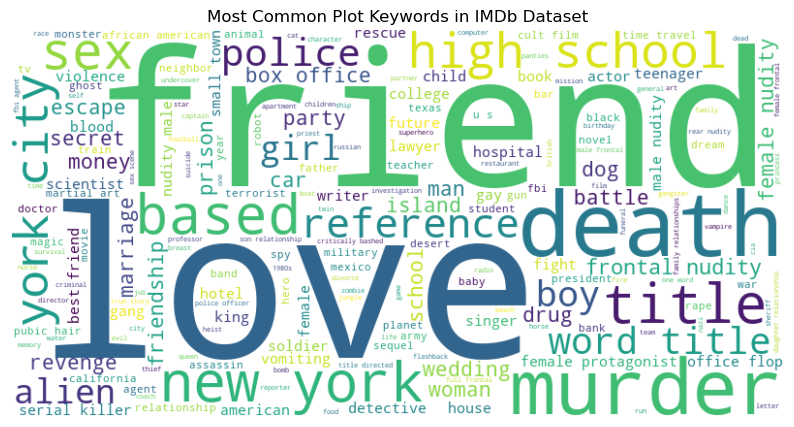

In [12]:
# ## Hücre 4: Özetlerin Analizi
# Özet sütunundaki verileri analiz etme
if 'plot_keywords' in imdb_data.columns:
    imdb_data['plot_keywords'] = imdb_data['plot_keywords'].fillna('')
    all_keywords = ' '.join(imdb_data['plot_keywords'].dropna().str.replace('|', ' '))
    keyword_counter = Counter(all_keywords.split())

    # En çok geçen anahtar kelimeleri gösterme
    print("\nMost Common Keywords:")
    print(keyword_counter.most_common(20))

    # WordCloud oluşturma
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Plot Keywords in IMDb Dataset')
    plt.show()
else:
    print("\nThe dataset does not contain a 'plot_keywords' column.")


Top 10 Directors with Most Movies:
director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Tim Burton           16
Steven Soderbergh    16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Name: count, dtype: int64


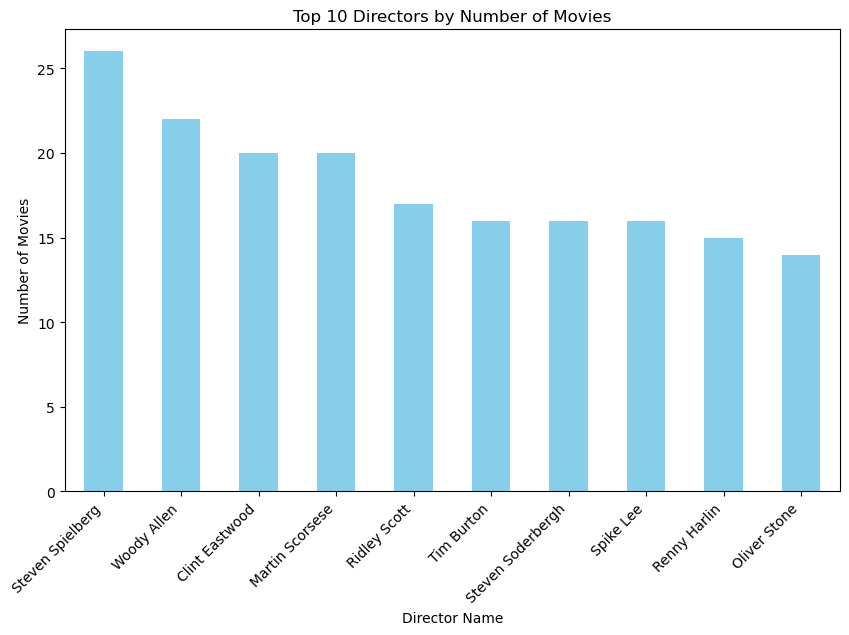

In [8]:
# ## Hücre 5: Yönetmenlerin Analizi
# En çok film yöneten yönetmenler
if 'director_name' in imdb_data.columns:
    director_counts = imdb_data['director_name'].value_counts().head(10)
    print("\nTop 10 Directors with Most Movies:")
    print(director_counts)

    # Bar grafiği
    director_counts.plot(kind='bar', figsize=(10, 6), title='Top 10 Directors by Number of Movies', color='skyblue')
    plt.xlabel('Director Name')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("\nThe dataset does not contain a 'director_name' column.")


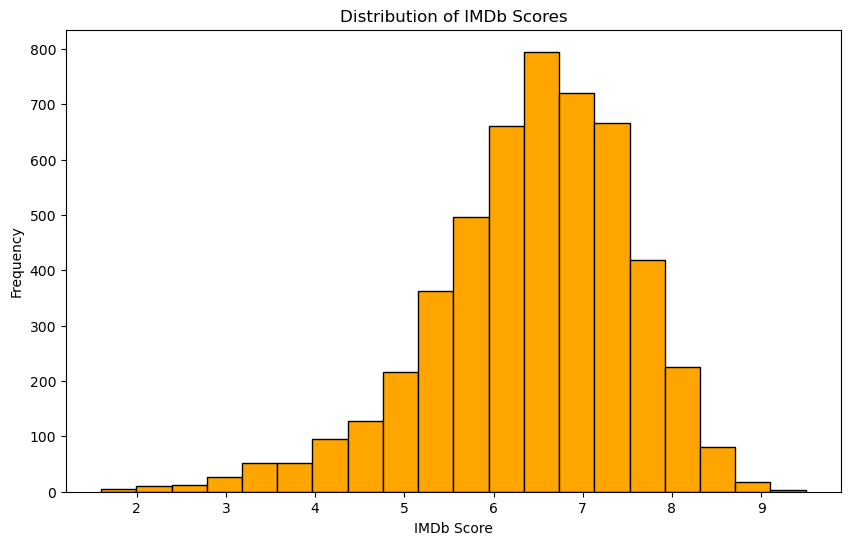

In [9]:
# ## Hücre 6: IMDb Puanlarının Analizi
# IMDb puanlarının dağılımını inceleme
if 'imdb_score' in imdb_data.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(imdb_data['imdb_score'].dropna(), bins=20, color='orange', edgecolor='black')
    plt.title('Distribution of IMDb Scores')
    plt.xlabel('IMDb Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\nThe dataset does not contain an 'imdb_score' column.")


Correlation Matrix:
                           num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.258486   
duration                                 0.258486  1.000000   
director_facebook_likes                  0.180674  0.173296   
actor_3_facebook_likes                   0.271646  0.123558   
actor_1_facebook_likes                   0.190016  0.088449   
gross                                    0.480601  0.250298   
num_voted_users                          0.624943  0.314765   
cast_total_facebook_likes                0.263203  0.123074   
facenumber_in_poster                    -0.033897  0.013469   
num_user_for_reviews                     0.609387  0.328403   
budget                                   0.119994  0.074276   
title_year                               0.275707 -0.135038   
actor_2_facebook_likes                   0.282306  0.131673   
imdb_score                               0.305303  0.261662   
aspect_ratio                      

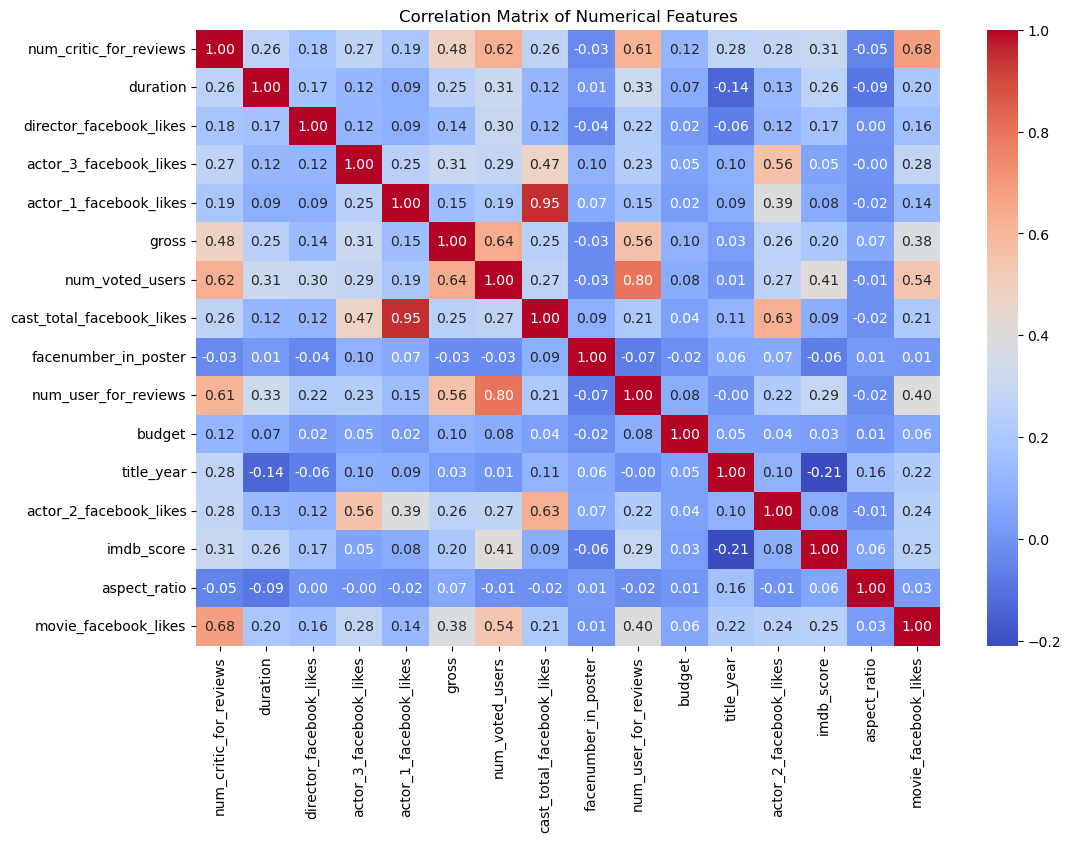

In [10]:
# ## Hücre 7: Korelasyon Matrisi
# Numerik sütunlar üzerinden korelasyon matrisi oluşturma
numerical_columns = imdb_data.select_dtypes(include=[np.number]).columns
if not numerical_columns.empty:
    correlation_matrix = imdb_data[numerical_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Korelasyon matrisinin görselleştirilmesi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("\nNo numerical columns available for correlation matrix.")

In [11]:
# ## Hücre 8: Türlerin (Genres) Düzenlenmesi
if 'genres' in imdb_data.columns:
    imdb_data['genres'] = imdb_data['genres'].fillna('')
    imdb_data['genres'] = imdb_data['genres'].str.replace('|', ', ')
    print("\nSample Genres After Cleaning:")
    print(imdb_data['genres'].head())
else:
    print("\nThe dataset does not contain a 'genres' column.")


Sample Genres After Cleaning:
0    Action, Adventure, Fantasy, Sci-Fi
1            Action, Adventure, Fantasy
2           Action, Adventure, Thriller
3                      Action, Thriller
4                           Documentary
Name: genres, dtype: object
